In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("/Users/nithyaprasath/Downloads/Github/Fake Jobs/fake_job_posting.csv")

In [3]:
pwd

'/Users/nithyaprasath/Downloads/Github/Fake Jobs'

In [5]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [10]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [12]:
data=data.drop(['job_id', 'title','location', 'department', 'salary_range', 'description', 'requirements', 'benefits',
       'company_profile'],axis=1)

In [20]:
col_list=list(data.columns)
col_list

['telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent']

In [22]:
for i in col_list:
    if data[i].dtype=='object':
        data[i]=data[i].replace(np.nan,data[i].mode()[0],regex=True)

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
for i in col_list:
    if data[i].dtype=='object':
        data[i]=le.fit_transform(data[i])

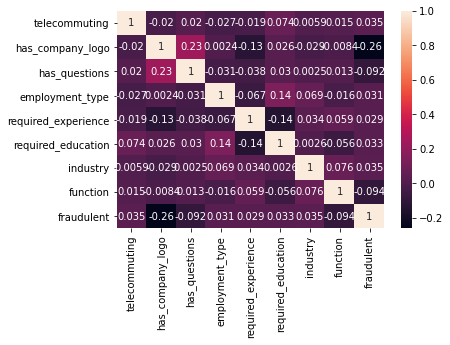

In [28]:
corrmatrix=data.corr()
sns.heatmap(corrmatrix,annot=True)
plt.show()

In [30]:
correlation_mat = data.corr()
corr_pairs = correlation_mat.unstack()
print(corr_pairs)

telecommuting  telecommuting          1.000000
               has_company_logo      -0.019836
               has_questions          0.020345
               employment_type       -0.027146
               required_experience   -0.019088
                                        ...   
fraudulent     required_experience    0.029351
               required_education     0.033287
               industry               0.034838
               function              -0.094321
               fraudulent             1.000000
Length: 81, dtype: float64


In [31]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

fraudulent           has_company_logo      -0.261971
has_company_logo     fraudulent            -0.261971
required_education   required_experience   -0.141672
required_experience  required_education    -0.141672
                     has_company_logo      -0.125758
                                              ...   
employment_type      employment_type        1.000000
has_questions        has_questions          1.000000
has_company_logo     has_company_logo       1.000000
function             function               1.000000
fraudulent           fraudulent             1.000000
Length: 81, dtype: float64


In [32]:
negative_pairs = sorted_pairs[sorted_pairs < 0]
print(negative_pairs)

fraudulent           has_company_logo      -0.261971
has_company_logo     fraudulent            -0.261971
required_education   required_experience   -0.141672
required_experience  required_education    -0.141672
                     has_company_logo      -0.125758
has_company_logo     required_experience   -0.125758
fraudulent           function              -0.094321
function             fraudulent            -0.094321
fraudulent           has_questions         -0.091627
has_questions        fraudulent            -0.091627
required_experience  employment_type       -0.066785
employment_type      required_experience   -0.066785
required_education   function              -0.056305
function             required_education    -0.056305
required_experience  has_questions         -0.037868
has_questions        required_experience   -0.037868
                     employment_type       -0.030921
employment_type      has_questions         -0.030921
has_company_logo     industry              -0.

In [33]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

telecommuting        telecommuting          1.0
required_experience  required_experience    1.0
industry             industry               1.0
required_education   required_education     1.0
employment_type      employment_type        1.0
has_questions        has_questions          1.0
has_company_logo     has_company_logo       1.0
function             function               1.0
fraudulent           fraudulent             1.0
dtype: float64


In [82]:
x=data.drop(['fraudulent'],axis=1)

In [83]:
y=data['fraudulent']

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)

In [85]:
x_train.shape,x_test.shape

((27222, 8), (6806, 8))

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)

/Users/nithyaprasath/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [87]:
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.748751101968851

In [88]:
from sklearn.neighbors import KNeighborsClassifier
lst=[]
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores=accuracy_score(y_test,y_pred)
    lst.append(scores)

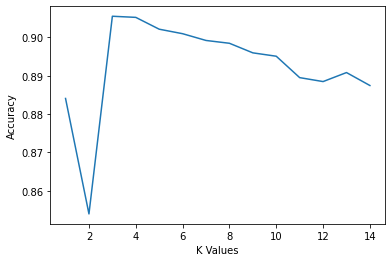

In [89]:
plt.plot(range(1,15),lst)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.show()

In [91]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.9055245371730826

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

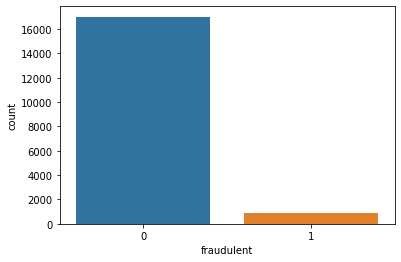

In [70]:
sns.countplot(x='fraudulent',data=data)

In [74]:
class_count_0, class_count_1 = data['fraudulent'].value_counts()

class_0 = data[data['fraudulent'] == 0]
class_1 = data[data['fraudulent'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (17014, 9)
class 1: (866, 9)


total class of 1 and 0: 1    17014
0    17014
Name: fraudulent, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

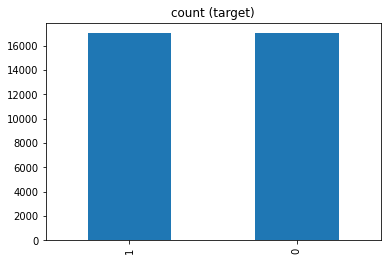

In [80]:
class_1_over = class_1.sample(class_count_0, replace=True)
data= pd.concat([class_1_over, class_0], axis=0)
print("total class of 1 and 0:",data['fraudulent'].value_counts())# plot the count after under-sampeling
data['fraudulent'].value_counts().plot(kind='bar', title='count (target)')

In [92]:
import pickle

In [ ]:
pickle.dump